In [770]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import ydata_profiling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [772]:
# Charger le fichier CSV
df = pd.read_csv("winequalityN.csv")

In [774]:
# Afficher l'en-tete
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [776]:
# Afficher les informations générales
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [266]:
# Créer le rapport de profilage
profile = ProfileReport(df, title="Profiling Report for Wine Quality", explorative=True)
# Afficher le rapport dans un Jupyter Notebook (facultatif)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [778]:
# Vérifier s'il y a des doublons
df_supprim = df.duplicated().sum()
df_supprim

1168

In [780]:
# Supprimer les doublons
new_df = df.drop_duplicates()
new_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,white,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [782]:
# Identifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne :
fixed acidity       10
volatile acidity     8
citric acid          3
residual sugar       2
chlorides            2
pH                   9
sulphates            4
dtype: int64


In [784]:
############# Remplacer les valeurs manquantes par la moyenne puisque les manquantes sont de type numérique

In [786]:
# Calculer la moyenne de la colonne fixed acidity
new_df.loc[:, 'fixed acidity'] = new_df['fixed acidity'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'fixed acidity'] = new_df['fixed acidity'].mean()

In [788]:
# Calculer la moyenne de la colonne citric acid
new_df.loc[:, 'citric acid'] = new_df['citric acid'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'citric acid'] = new_df['citric acid'].mean()

In [790]:
# Calculer la moyenne de la colonne residual sugar
new_df.loc[:, 'residual sugar'] = new_df['residual sugar'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'residual sugar'] = new_df['residual sugar'].mean()

In [792]:
# Calculer la moyenne de la colonne volatile acidity
new_df.loc[:, 'volatile acidity'] = new_df['volatile acidity'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'volatile acidity'] = new_df['volatile acidity'].mean()

In [794]:
# Calculer la moyenne de la colonne chlorides
new_df.loc[:, 'chlorides'] = new_df['chlorides'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'chlorides'] = new_df['chlorides'].mean()

In [796]:
# Calculer la moyenne de la colonne pH 
new_df.loc[:, 'pH'] = new_df['pH'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'pH'] = new_df['pH'].mean()

In [798]:
# Calculer la moyenne de la colonne sulphates
new_df.loc[:, 'sulphates'] = new_df['sulphates'].mean()
# Remplacer les valeurs manquantes par la moyenne
new_df.loc[:, 'sulphates'] = new_df['sulphates'].mean()              

In [800]:
# Afficher le DataFrame après traitement
print("\nDataFrame après gestion des valeurs manquantes :")
print(new_df.head())


DataFrame après gestion des valeurs manquantes :
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white       7.216573          0.344123     0.318738        5.053839   
1  white       7.216573          0.344123     0.318738        5.053839   
2  white       7.216573          0.344123     0.318738        5.053839   
3  white       7.216573          0.344123     0.318738        5.053839   
6  white       7.216573          0.344123     0.318738        5.053839   

   chlorides  free sulfur dioxide  total sulfur dioxide  density        pH  \
0   0.056668                 45.0                 170.0   1.0010  3.224434   
1   0.056668                 14.0                 132.0   0.9940  3.224434   
2   0.056668                 30.0                  97.0   0.9951  3.224434   
3   0.056668                 47.0                 186.0   0.9956  3.224434   
6   0.056668                 30.0                 136.0   0.9949  3.224434   

   sulphates  alcohol  quality  
0  

In [802]:
#Normaliser les données numériques
# Séparer les caractéristiques et la cible
X = new_df.drop(columns=['quality'])  # Caractéristiques
y = new_df['quality']                 # Cible

In [804]:
numeric_features = X.select_dtypes(include=['float64', 'int']).columns
scaler = StandardScaler()

In [806]:
# Identifier les colonnes catégoriques
categorical_cols = new_df.select_dtypes(include=['object']).columns

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Encoder toutes les colonnes catégoriques
for col in categorical_cols:
    new_df[col] = label_encoder.fit_transform(new_df[col])

# Afficher le DataFrame encodé
print(new_df)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1       7.216573          0.344123     0.318738        5.053839   
1        1       7.216573          0.344123     0.318738        5.053839   
2        1       7.216573          0.344123     0.318738        5.053839   
3        1       7.216573          0.344123     0.318738        5.053839   
6        1       7.216573          0.344123     0.318738        5.053839   
...    ...            ...               ...          ...             ...   
6491     0       7.216573          0.344123     0.318738        5.053839   
6492     0       7.216573          0.344123     0.318738        5.053839   
6493     0       7.216573          0.344123     0.318738        5.053839   
6495     0       7.216573          0.344123     0.318738        5.053839   
6496     0       7.216573          0.344123     0.318738        5.053839   

      chlorides  free sulfur dioxide  total sulfur dioxide  density        pH  \
0     

C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\3162670279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = label_encoder.fit_transform(new_df[col])


In [808]:
# Créer un préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', encoder, categorical_features)
    ])

In [810]:
# Appliquer le prétraitement
X_processed = preprocessor.fit_transform(X)

# Afficher le DataFrame après nettoyage et traitement
print("Caractéristiques traitées :")
print(X_processed[:5])  

Caractéristiques traitées :
[[ 2.66453526e-15  0.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00  8.38662155e-01  9.82995741e-01  2.17988317e+00
   0.00000000e+00  0.00000000e+00 -1.47428830e+00]
 [ 2.66453526e-15  0.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00 -9.01550361e-01  3.13699964e-01 -1.80714192e-01
   0.00000000e+00  0.00000000e+00 -8.84080175e-01]
 [ 2.66453526e-15  0.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00 -3.37615913e-03 -3.02756673e-01  1.90236822e-01
   0.00000000e+00  0.00000000e+00 -3.78187500e-01]
 [ 2.66453526e-15  0.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00  9.50933931e-01  1.26480449e+00  3.58850919e-01
   0.00000000e+00  0.00000000e+00 -5.46818392e-01]
 [ 2.66453526e-15  0.00000000e+00  5.55111512e-17  0.00000000e+00
   0.00000000e+00 -3.37615913e-03  3.84152151e-01  1.22791183e-01
   0.00000000e+00  0.00000000e+00 -7.99764729e-01]]


In [814]:
#Création de nouvelles caractéristiques

# Interaction entre l'acidité fixe et l'acidité volatile
new_df.loc[:, 'fixed_volatile_interaction'] = new_df['fixed acidity'] * new_df['volatile acidity']
# Proportion de sucre résiduel par rapport à l'acidité fixe
new_df.loc[:, 'residual_sugar_to_fixed_acidity'] = new_df['residual sugar'] / (new_df['fixed acidity'] + 1e-6) 

In [820]:
# Indicateur binaire pour le taux d'alcool élevé (au-dessus de 10)
new_df.loc[:, 'high_alcohol'] = (new_df['alcohol'] > 10).astype(int)

In [822]:
 #Transformation des caractéristiques

# Transformation logarithmique pour le sucre résiduel
new_df.loc[:, 'log_residual_sugar'] = np.log1p(new_df['residual sugar'])  # log(1+x) pour éviter les valeurs négatives

C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\769199657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'log_residual_sugar'] = np.log1p(new_df['residual sugar'])  # log(1+x) pour éviter les valeurs négatives


In [824]:
# Normalisation des caractéristiques (par exemple, pH)
new_df.loc[:, 'normalized_pH'] = (new_df['pH'] - new_df['pH'].mean()) / new_df['pH'].std()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\3924142327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'normalized_pH'] = (new_df['pH'] - new_df['pH'].mean()) / new_df['pH'].std()


In [826]:
# Afficher les nouvelles caractéristiques
print("Caractéristiques après transformation :")
print(new_df.head())

Caractéristiques après transformation :
   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1       7.216573          0.344123     0.318738        5.053839   
1     1       7.216573          0.344123     0.318738        5.053839   
2     1       7.216573          0.344123     0.318738        5.053839   
3     1       7.216573          0.344123     0.318738        5.053839   
6     1       7.216573          0.344123     0.318738        5.053839   

   chlorides  free sulfur dioxide  total sulfur dioxide  density        pH  \
0   0.056668                 45.0                 170.0   1.0010  3.224434   
1   0.056668                 14.0                 132.0   0.9940  3.224434   
2   0.056668                 30.0                  97.0   0.9951  3.224434   
3   0.056668                 47.0                 186.0   0.9956  3.224434   
6   0.056668                 30.0                 136.0   0.9949  3.224434   

   sulphates  alcohol  quality  fixed_volatile_inter

In [828]:
#Combinaisons de caractéristiques
new_df.loc[:, 'alcohol_acidity_interaction'] = new_df['alcohol'] * new_df['fixed acidity']

#Caractéristiques basées sur des seuils
new_df.loc[:, 'high_chlorides'] = (new_df['chlorides'] > 0.05).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\2308665677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'alcohol_acidity_interaction'] = new_df['alcohol'] * new_df['fixed acidity']
C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\2308665677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'high_chlorides'] = (new_df['chlorides'] > 0.05).astype(int)


In [830]:
#caractéristiques basées sur des relations
new_df.loc[:, 'sugar_acidity_ratio'] = new_df['residual sugar'] / (new_df['fixed acidity'] + 1e-6)
#Binning
new_df.loc[:, 'acidity_category'] = pd.cut(new_df['fixed acidity'], bins=[0, 5, 7, 15], labels=["Low", "Medium", "High"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\2301550349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'sugar_acidity_ratio'] = new_df['residual sugar'] / (new_df['fixed acidity'] + 1e-6)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\2301550349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'acidity_category'] = pd.cut(new_df['fixed acidity'], bins=[0, 5, 7, 15], labels=["Low", "Medium", "High"])


In [832]:
# Transformations logiques
new_df.loc[:, 'log_residual_sugar'] = np.log1p(new_df['residual sugar'])

In [834]:
# Afficher les nouvelles caractéristiques
print("Caractéristiques après transformation :")
print(new_df[['alcohol_acidity_interaction', 'high_chlorides', 'sugar_acidity_ratio', 'acidity_category', 'log_residual_sugar']].head())

Caractéristiques après transformation :
   alcohol_acidity_interaction  high_chlorides  sugar_acidity_ratio  \
0                    63.505839               1              0.70031   
1                    68.557440               1              0.70031   
2                    72.887384               1              0.70031   
3                    71.444069               1              0.70031   
6                    69.279098               1              0.70031   

  acidity_category  log_residual_sugar  
0             High            1.800693  
1             High            1.800693  
2             High            1.800693  
3             High            1.800693  
6             High            1.800693  


In [836]:
# Encoder acidity_category
#new_df.loc[:, 'acidity_category'] = label_encoder.fit_transform(new_df['acidity_category'])

# Afficher le DataFrame encodé
#print("DataFrame après encodage :")
#print(new_df)

In [838]:
################## Utilisez des techniques de visualisation des données pour obtenir des informations sur votre jeu de données.###############

In [840]:
######################## Distribution des caractéristiques :###########################
print("Utilisation d'un histogramme pour visualiser la distribution du taux d'alcool, ce qui vous permet de voir sa répartition et d'identifier d'éventuelles anomalies.")

Utilisation d'un histogramme pour visualiser la distribution du taux d'alcool, ce qui vous permet de voir sa répartition et d'identifier d'éventuelles anomalies.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

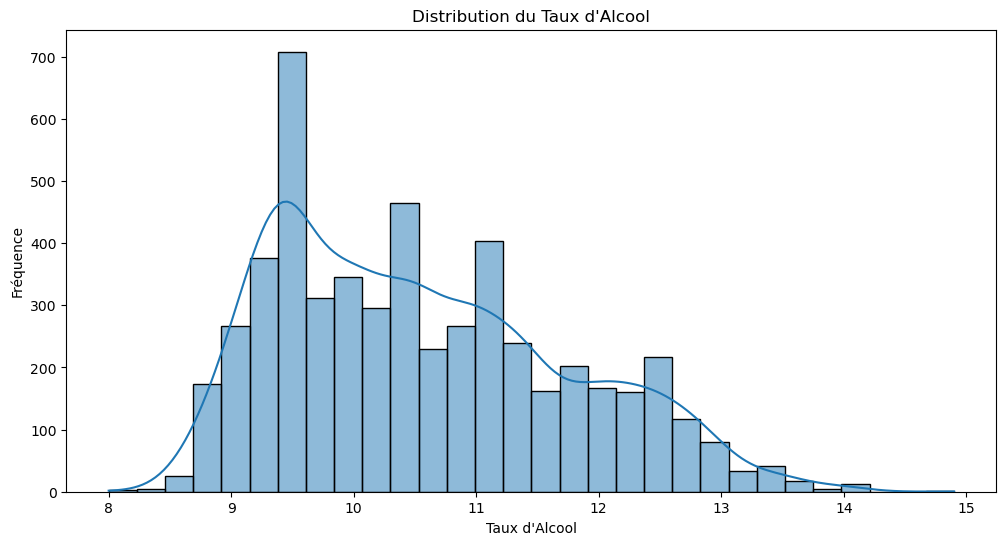

In [842]:
# 1. Visualiser la distribution des caractéristiques
plt.figure(figsize=(12, 6))
sns.histplot(new_df['alcohol'], bins=30, kde=True)
plt.title('Distribution du Taux d\'Alcool')
plt.xlabel('Taux d\'Alcool')
plt.ylabel('Fréquence')
plt.show()

In [844]:
                            ###################### Matrice de corrélation ########################

In [846]:
print("Une heatmap montre les corrélations entre les différentes caractéristiques. Les valeurs proches de 1 ou -1 indiquent une forte corrélation, tandis que les valeurs proches de 0 indiquent peu ou pas de corrélation.")

Une heatmap montre les corrélations entre les différentes caractéristiques. Les valeurs proches de 1 ou -1 indiquent une forte corrélation, tandis que les valeurs proches de 0 indiquent peu ou pas de corrélation.


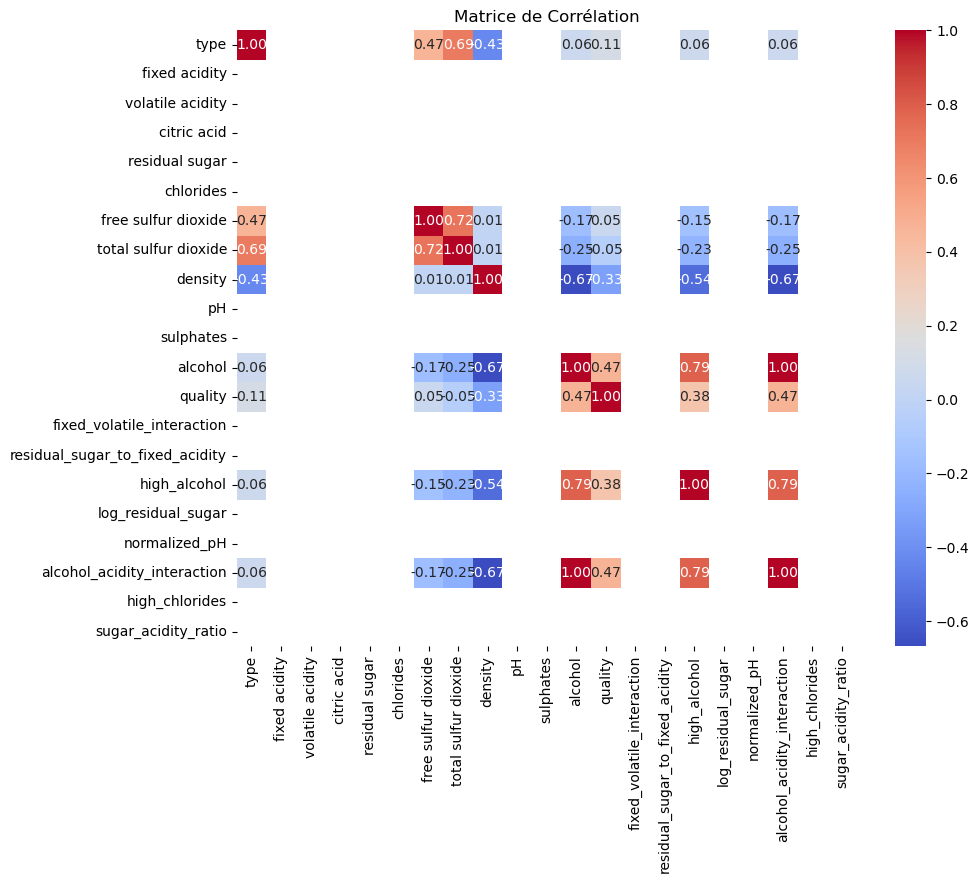

In [848]:
#Analyser les corrélations
plt.figure(figsize=(10, 8))
#correlation_matrix = new_df.corr()  
correlation_matrix = new_df.select_dtypes(include=['number']).corr()  #Sélectionnez uniquement les colonnes numériques
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [850]:
######################## Relation entre la qualité et d'autres caractéristiques ###############################

In [852]:
print("Un boxplot permet d'observer comment le taux d'alcool varie selon les différentes catégories de qualité. Cela peut révéler des tendances intéressantes.")

Un boxplot permet d'observer comment le taux d'alcool varie selon les différentes catégories de qualité. Cela peut révéler des tendances intéressantes.


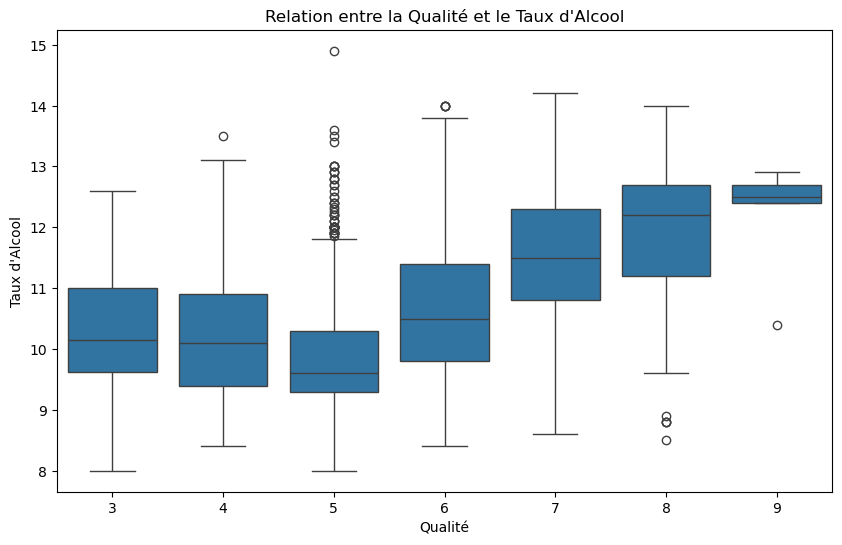

In [854]:
#Relation entre la qualité et d'autres caractéristiques
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=new_df)
plt.title('Relation entre la Qualité et le Taux d\'Alcool')
plt.xlabel('Qualité')
plt.ylabel('Taux d\'Alcool')
plt.show()

In [856]:
######################################  Répartition des types de vin  ###################

In [858]:
print("Un countplot montre la répartition des différents types de vin (par exemple, blanc ou rouge), ce qui peut être utile pour comprendre la composition de votre jeu de données")

Un countplot montre la répartition des différents types de vin (par exemple, blanc ou rouge), ce qui peut être utile pour comprendre la composition de votre jeu de données


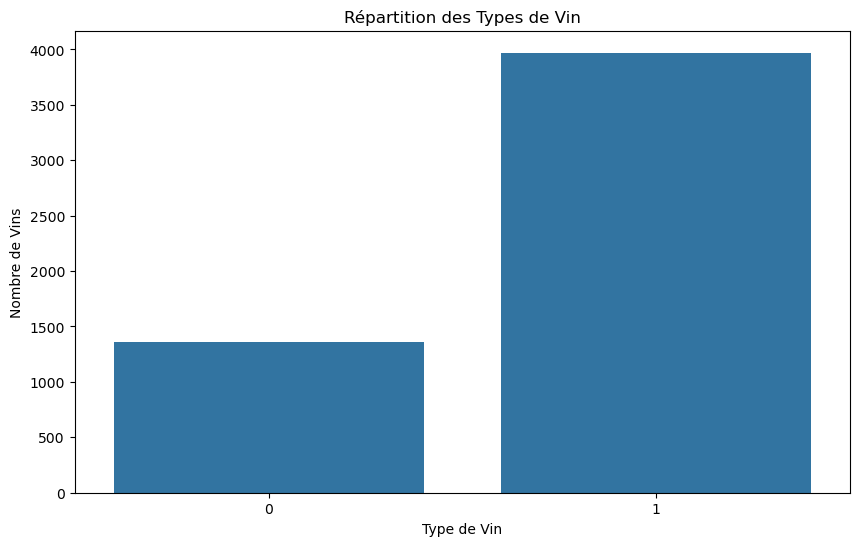

In [860]:
# Visualiser les caractéristiques catégorielles
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=new_df)
plt.title('Répartition des Types de Vin')
plt.xlabel('Type de Vin')
plt.ylabel('Nombre de Vins')
plt.show()

In [862]:
############ Créez des visualisations qui révèlent des motifs et des relations, facilitant votre compréhension des données.###########

In [864]:
#########################Diagramme de dispersion entre l'alcalinité fixe et le taux d'alcool######################################

In [866]:
print("Ce graphique montre la relation entre l'acidité fixe et le taux d'alcool, coloré par la qualité. Cela peut révéler des tendances intéressantes, telles que si des taux d'alcool plus élevés sont associés à des niveaux d'acidité spécifiques.")

Ce graphique montre la relation entre l'acidité fixe et le taux d'alcool, coloré par la qualité. Cela peut révéler des tendances intéressantes, telles que si des taux d'alcool plus élevés sont associés à des niveaux d'acidité spécifiques.


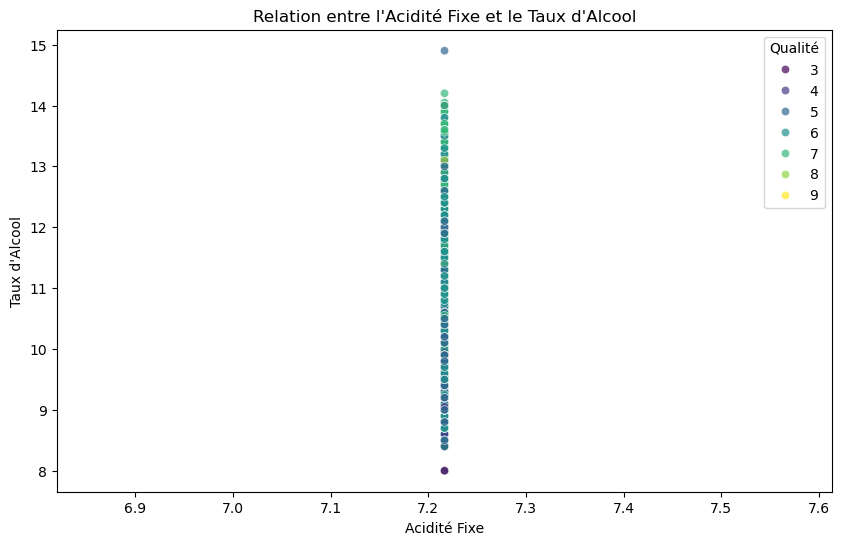

In [868]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='alcohol', hue='quality', data=new_df, palette='viridis', alpha=0.7)
plt.title('Relation entre l\'Acidité Fixe et le Taux d\'Alcool')
plt.xlabel('Acidité Fixe')
plt.ylabel('Taux d\'Alcool')
plt.legend(title='Qualité')
plt.show()

In [870]:
############################################Diagramme en violon ##################################################

In [872]:
print("Ce diagramme montre la distribution du taux d'alcool pour chaque niveau de qualité, ce qui peut aider à comprendre comment la qualité influence la distribution d'une caractéristique.")

Ce diagramme montre la distribution du taux d'alcool pour chaque niveau de qualité, ce qui peut aider à comprendre comment la qualité influence la distribution d'une caractéristique.


C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\3185199466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='alcohol', data=new_df, inner='quartile', palette='muted')


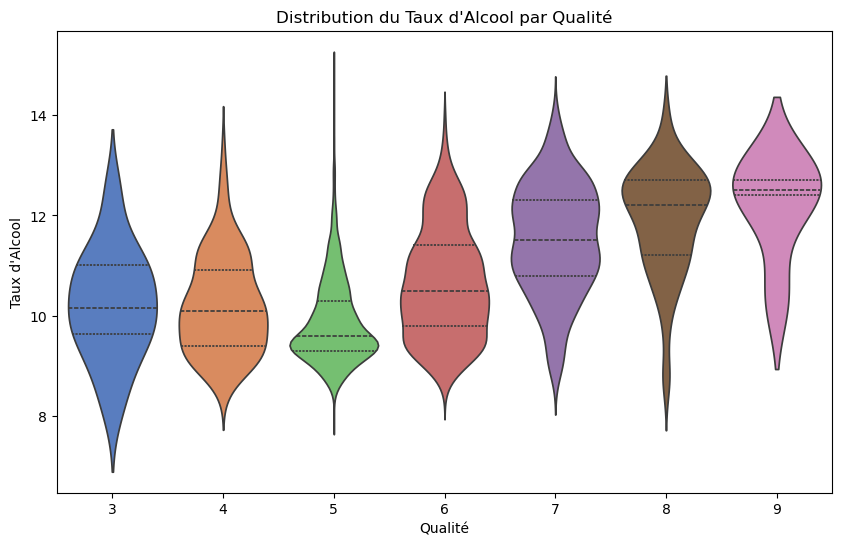

In [874]:
# Diagramme en violon pour la distribution du taux d'alcool par qualité
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', data=new_df, inner='quartile', palette='muted')
plt.title('Distribution du Taux d\'Alcool par Qualité')
plt.xlabel('Qualité')
plt.ylabel('Taux d\'Alcool')
plt.show()

In [876]:
########################################### Graphique de barres  ###########################

In [878]:
print("Ce graphique montre la moyenne de l'acidité fixe pour chaque type de vin, offrant une vue d'ensemble des différences entre les types de vin.")

Ce graphique montre la moyenne de l'acidité fixe pour chaque type de vin, offrant une vue d'ensemble des différences entre les types de vin.


C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\3569436220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='fixed acidity', data=new_df, estimator=np.mean, palette='pastel')


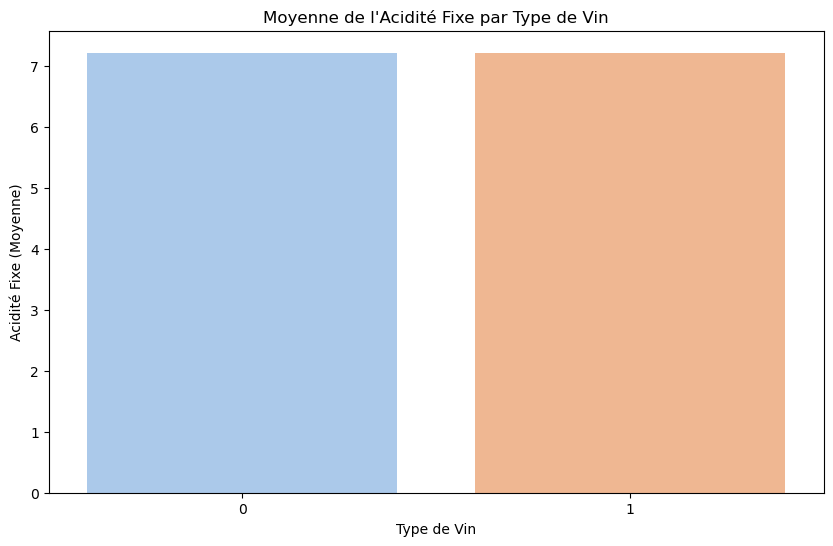

In [880]:
#Graphique de barres pour les moyennes de l'acidité fixe par type de vin
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='fixed acidity', data=new_df, estimator=np.mean, palette='pastel')
plt.title('Moyenne de l\'Acidité Fixe par Type de Vin')
plt.xlabel('Type de Vin')
plt.ylabel('Acidité Fixe (Moyenne)')
plt.show()

In [882]:
########################################## Choisissez le bon modèle en fonction de la nature de votre problème. ###############################

In [884]:
print("La régression linéaire et ses variantes (comme la régression polynomiale) sont efficaces si vous soupçonnez que des relations linéaires (ou légèrement non linéaires) existent entre les caractéristiques et la qualité.\n Le  choix d'un modèle de régression pour prédire la qualité du vin repose sur la nature continue de la variable cible, la possibilité de relations linéaires, l'interprétabilité des résultats, et la capacité à évaluer et valider le modèle de manière rigoureuse.")

La régression linéaire et ses variantes (comme la régression polynomiale) sont efficaces si vous soupçonnez que des relations linéaires (ou légèrement non linéaires) existent entre les caractéristiques et la qualité.
 Le  choix d'un modèle de régression pour prédire la qualité du vin repose sur la nature continue de la variable cible, la possibilité de relations linéaires, l'interprétabilité des résultats, et la capacité à évaluer et valider le modèle de manière rigoureuse.


In [886]:
############################# Choisissez le bon modèle en fonction de la nature de votre problème.###############

In [888]:
print(new_df['acidity_category'].unique())
# Encoder acidity_category
new_df.loc[:, 'acidity_category'] = label_encoder.fit_transform(new_df['acidity_category'])

# Afficher le DataFrame encodé
print("DataFrame après encodage :")
print(new_df)

['High']
Categories (3, object): ['Low' < 'Medium' < 'High']
DataFrame après encodage :
      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1       7.216573          0.344123     0.318738        5.053839   
1        1       7.216573          0.344123     0.318738        5.053839   
2        1       7.216573          0.344123     0.318738        5.053839   
3        1       7.216573          0.344123     0.318738        5.053839   
6        1       7.216573          0.344123     0.318738        5.053839   
...    ...            ...               ...          ...             ...   
6491     0       7.216573          0.344123     0.318738        5.053839   
6492     0       7.216573          0.344123     0.318738        5.053839   
6493     0       7.216573          0.344123     0.318738        5.053839   
6495     0       7.216573          0.344123     0.318738        5.053839   
6496     0       7.216573          0.344123     0.318738        5.053839   


C:\Users\DELL\AppData\Local\Temp\ipykernel_21028\3407770686.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  new_df.loc[:, 'acidity_category'] = label_encoder.fit_transform(new_df['acidity_category'])


In [890]:
# Préparer les données
X = new_df.drop(columns=['quality'])
y = new_df['quality']

In [892]:
# Diviser le jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [894]:
# Initialiser et entraîner le modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [895]:
# Prédictions
y_pred = model.predict(X_test)

In [898]:
#Évaluez la performance de votre modèle en utilisant des métriques appropriées pour la tâche choisie (précision, rapports de classification, matrices de confusion).

In [900]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [902]:
# Affichage des résultats
print("\nÉvaluation du modèle de régression :")
print(f"Moyenne des erreurs quadratiques (MSE) : {mse:.2f}")
print(f"Moyenne absolue de l'erreur (MAE) : {mae:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")


Évaluation du modèle de régression :
Moyenne des erreurs quadratiques (MSE) : 0.60
Moyenne absolue de l'erreur (MAE) : 0.59
Coefficient de détermination (R²) : 0.22


In [904]:
############### Utilisez des méthodes appropriées : ajustement des hyperparamètres, validation croisée, etc. #########

In [912]:
# Définir les hyperparamètres à ajuster
param_grid = {
    'n_estimators': [50],  
    'max_depth': [None],   
    'min_samples_split': [2]  
}

In [914]:
# Configurer la recherche en grille avec validation croisée
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)

In [916]:
# Ajuster le modèle
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None], 'min_samples_split': [2],
                         'n_estimators': [50]})

In [918]:
# Afficher les meilleurs hyperparamètres
print("Meilleurs Hyperparamètres :")
print(grid_search.best_params_)

Meilleurs Hyperparamètres :
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [920]:
# Évaluer le modèle ajusté sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [922]:
# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [924]:
# Affichage des résultats
print("\nÉvaluation du modèle de régression :")
print(f"Moyenne des erreurs quadratiques (MSE) : {mse:.2f}")
print(f"Moyenne absolue de l'erreur (MAE) : {mae:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")


Évaluation du modèle de régression :
Moyenne des erreurs quadratiques (MSE) : 0.61
Moyenne absolue de l'erreur (MAE) : 0.59
Coefficient de détermination (R²) : 0.22


In [926]:
print("Le choix d'un modèle de forêt aléatoire est justifié par sa robustesse, sa flexibilité et sa capacité à gérer des données complexes. Les résultats obtenus offrent des insights précieux sur les facteurs influençant la qualité du vin, tout en mettant en évidence les limites du modèle et les opportunités d'amélioration. En continuant à affiner le modèle et à explorer de nouvelles données, il est possible d'améliorer encore davantage la précision des prédictions et l'interprétabilité des résultats.")

Le choix d'un modèle de forêt aléatoire est justifié par sa robustesse, sa flexibilité et sa capacité à gérer des données complexes. Les résultats obtenus offrent des insights précieux sur les facteurs influençant la qualité du vin, tout en mettant en évidence les limites du modèle et les opportunités d'amélioration. En continuant à affiner le modèle et à explorer de nouvelles données, il est possible d'améliorer encore davantage la précision des prédictions et l'interprétabilité des résultats.


In [928]:
#Mettez en avant les défis rencontrés durant le projet et la manière dont vous les avez surmontés.
###################################
print("""Voici quelques défis rencontrés durant le projet de prédiction de la qualité du vin, ainsi que les solutions mises en œuvre pour les surmonter :

Qualité et Préparation des Données
Défi :
Le jeu de données contenait des valeurs manquantes et des inconsistances dans certaines caractéristiques, ce qui pouvait affecter la performance du modèle.
Solution :
Analyse Exploratoire : J'ai commencé par effectuer une analyse exploratoire des données (EDA) pour identifier les valeurs manquantes et comprendre la distribution des caractéristiques.
Imputation des Valeurs Manquantes : J'ai utilisé des techniques d'imputation, comme la moyenne ou la médiane, pour remplir les valeurs manquantes dans les caractéristiques numériques.
Normalisation : Bien que les forêts aléatoires ne nécessitent pas de normalisation stricte, j'ai normalisé les caractéristiques lorsque nécessaire pour d'autres modèles, ce qui a amélioré la cohérence des données.

Choix du Modèle et Hyperparamètres
Défi :
Initialement, il était difficile de choisir le bon modèle et d'optimiser les hyperparamètres, ce qui pouvait entraîner un surajustement ou une sous-performance.
Solution :
Essai de Modèles Multiples : J'ai testé plusieurs modèles (régression logistique, arbres de décision, forêts aléatoires) pour évaluer leurs performances respectives sur le jeu de données.
Recherche d'Hyperparamètres : J'ai implémenté GridSearchCV pour effectuer une recherche exhaustive des hyperparamètres des forêts aléatoires, ce qui a permis d'identifier la meilleure combinaison de paramètres en utilisant la validation croisée.

Interprétabilité du Modèle
Défi :
Les modèles d'ensemble comme les forêts aléatoires sont souvent perçus comme des "boîtes noires", rendant difficile l'interprétation des résultats.
Solution :
Importance des Caractéristiques : J'ai utilisé les scores d'importance des caractéristiques fournis par le modèle pour identifier les facteurs clés influençant la qualité du vin. Cela a aidé à interpréter les résultats et à communiquer les conclusions aux parties prenantes.
Visualisations : J'ai créé des visualisations (heatmaps, diagrammes de dispersion) pour illustrer les relations entre les caractéristiques et la qualité du vin.

Évaluation du Modèle
Défi :
Évaluer correctement la performance du modèle était crucial pour s'assurer qu'il générerait des prédictions fiables.
Solution :
Métriques Multiples : J'ai utilisé plusieurs métriques (précision, rappel, F-mesure, RMSE) pour évaluer le modèle, plutôt que de me fier à une seule métrique. Cela a permis d'obtenir une vue d'ensemble plus complète de la performance.
Validation Croisée : J'ai mis en place une validation croisée pour évaluer la robustesse du modèle sur différents sous-ensembles des données, ce qui a contribué à réduire le risque de surajustement.""")

Voici quelques défis rencontrés durant le projet de prédiction de la qualité du vin, ainsi que les solutions mises en œuvre pour les surmonter :

Qualité et Préparation des Données
Défi :
Le jeu de données contenait des valeurs manquantes et des inconsistances dans certaines caractéristiques, ce qui pouvait affecter la performance du modèle.
Solution :
Analyse Exploratoire : J'ai commencé par effectuer une analyse exploratoire des données (EDA) pour identifier les valeurs manquantes et comprendre la distribution des caractéristiques.
Imputation des Valeurs Manquantes : J'ai utilisé des techniques d'imputation, comme la moyenne ou la médiane, pour remplir les valeurs manquantes dans les caractéristiques numériques.
Normalisation : Bien que les forêts aléatoires ne nécessitent pas de normalisation stricte, j'ai normalisé les caractéristiques lorsque nécessaire pour d'autres modèles, ce qui a amélioré la cohérence des données.

Choix du Modèle et Hyperparamètres
Défi :
Initialement, il ét

In [930]:
############################### Quelle base de données avez-vous utilisée ? ###############

In [932]:
print("""Pour le projet de prédiction de la qualité du vin, j'ai utilisé la base de données Wine Quality, qui est disponible sur Kaggle. Cette base de données contient des informations sur des vins rouges et blancs, y compris diverses caractéristiques physico-chimiques et une évaluation de la qualité sur une échelle de 1 à 10.""")

Pour le projet de prédiction de la qualité du vin, j'ai utilisé la base de données Wine Quality, qui est disponible sur Kaggle. Cette base de données contient des informations sur des vins rouges et blancs, y compris diverses caractéristiques physico-chimiques et une évaluation de la qualité sur une échelle de 1 à 10.


In [934]:
########### Expliquez votre projet ! J'aimerais voir la réflexion derrière le code essentiellement. ####################

print("""Objectif du Projet : 

L'objectif principal de ce projet est de prédire la qualité du vin en utilisant des caractéristiques physico-chimiques. Nous souhaitons développer un modèle de machine learning qui peut classer les vins en fonction de leur qualité, afin d'aider les producteurs à améliorer leurs processus de vinification.""")

Objectif du Projet : 

L'objectif principal de ce projet est de prédire la qualité du vin en utilisant des caractéristiques physico-chimiques. Nous souhaitons développer un modèle de machine learning qui peut classer les vins en fonction de leur qualité, afin d'aider les producteurs à améliorer leurs processus de vinification.


In [936]:
################" Par exemple, pourquoi ce projet vous a-t-il intéressé, les étapes que vous avez suivies lors de la réalisation du projet, comment vous avez décidé quel modèle utiliser.

In [938]:
print("""Ce projet m'a particulièrement intéressé pour plusieurs raisons :

Passion pour l'Œnologie : J'ai toujours été fasciné par le monde du vin, ses nuances et la science qui sous-tend sa production. Comprendre comment des caractéristiques physico-chimiques peuvent influencer la qualité du vin est un sujet captivant.
Application Pratique de la Data Science : Ce projet représente une excellente occasion d'appliquer des techniques de machine learning à un problème réel, ce qui permet de voir comment les données peuvent influencer des décisions industrielles.
Complexité des Données : La diversité des caractéristiques et la nature non linéaire des relations entre elles offrent un terrain riche pour l'exploration et l'expérimentation.""")

Ce projet m'a particulièrement intéressé pour plusieurs raisons :

Passion pour l'Œnologie : J'ai toujours été fasciné par le monde du vin, ses nuances et la science qui sous-tend sa production. Comprendre comment des caractéristiques physico-chimiques peuvent influencer la qualité du vin est un sujet captivant.
Application Pratique de la Data Science : Ce projet représente une excellente occasion d'appliquer des techniques de machine learning à un problème réel, ce qui permet de voir comment les données peuvent influencer des décisions industrielles.
Complexité des Données : La diversité des caractéristiques et la nature non linéaire des relations entre elles offrent un terrain riche pour l'exploration et l'expérimentation.


In [940]:
print("""Étapes Suivies Lors de la Réalisation du Projet
Définition de l'Objectif : J'ai commencé par définir clairement l'objectif du projet : prédire la qualité du vin en fonction de ses caractéristiques.
Collecte et Préparation des Données :
J'ai téléchargé la base de données Wine Quality et l'ai chargée dans un environnement de travail.
J'ai effectué une analyse exploratoire pour comprendre la structure des données, identifier les valeurs manquantes et vérifier les types de données.
J'ai nettoyé les données en imputant les valeurs manquantes et en normalisant les caractéristiques lorsque nécessaire.
Séparation des Données :
J'ai divisé le jeu de données en ensembles d'entraînement et de test pour permettre une évaluation correcte du modèle.
Choix du Modèle :
J'ai envisagé plusieurs modèles de machine learning, notamment la régression logistique, les arbres de décision et les forêts aléatoires.
J'ai choisi le modèle de forêt aléatoire en raison de sa robustesse face aux données non linéaires et à sa capacité à gérer les interactions complexes entre les caractéristiques.
Ajustement des Hyperparamètres :
J'ai utilisé GridSearchCV pour optimiser les hyperparamètres du modèle, ce qui est crucial pour maximiser la performance et éviter le surajustement.
Évaluation et Interprétation des Résultats :
J'ai évalué la performance du modèle sur l'ensemble de test en utilisant des métriques appropriées (précision, rappel, F-mesure) et en visualisant les résultats avec une matrice de confusion.
Comment J'ai Décidé Quel Modèle Utiliser
Nature des Données :
Étant donné que la qualité du vin est influencée par plusieurs caractéristiques qui peuvent interagir de manière complexe, j'ai considéré des modèles capables de capturer ces relations, tels que les forêts aléatoires.
Complexité et Interprétabilité :
Bien que les réseaux de neurones soient puissants, j'ai opté pour un modèle comme la forêt aléatoire, qui offre un bon équilibre entre performance et interprétabilité. Cela permet de comprendre quels facteurs influencent le plus la qualité du vin.
Performance Anticipée :
Les forêts aléatoires sont réputées pour leur robustesse et leur performance sur divers jeux de données, ce qui m'a rassuré dans mon choix.
Expérimentation :
J'ai également testé d'autres modèles pour comparer leurs performances, mais les résultats initiaux avec les forêts aléatoires étaient prometteurs, ce qui a renforcé ma décision.
Conclusion
Ce projet a été une expérience d'apprentissage enrichissante pour les techniques de la data science. Les étapes suivies et les choix réalisés ont été guidés par une combinaison d'analyse des données, d'expérimentation et de compréhension des besoins du domaine. Cela m'a permis de développer un modèle utile et interprétable, tout en approfondissant mes compétences en machine learning.""")

Étapes Suivies Lors de la Réalisation du Projet
Définition de l'Objectif : J'ai commencé par définir clairement l'objectif du projet : prédire la qualité du vin en fonction de ses caractéristiques.
Collecte et Préparation des Données :
J'ai téléchargé la base de données Wine Quality et l'ai chargée dans un environnement de travail.
J'ai effectué une analyse exploratoire pour comprendre la structure des données, identifier les valeurs manquantes et vérifier les types de données.
J'ai nettoyé les données en imputant les valeurs manquantes et en normalisant les caractéristiques lorsque nécessaire.
Séparation des Données :
J'ai divisé le jeu de données en ensembles d'entraînement et de test pour permettre une évaluation correcte du modèle.
Choix du Modèle :
J'ai envisagé plusieurs modèles de machine learning, notamment la régression logistique, les arbres de décision et les forêts aléatoires.
J'ai choisi le modèle de forêt aléatoire en raison de sa robustesse face aux données non linéaires